In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
##### INDEED #####

# a job posting website (as well as resume hosting)


# scrape some (or A LOT) of job postings from indeed for the job "data scientist"


# Plan of Action:
# http://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA
# 1. Figure out the url for getting the summaries (by doing it yourself!)
# 2. Scrape the summary
# 3. Figure out how to change the page by changing the URL (hint, click the next page button and see how the url changes)
# 4. BONUS: count the most used words in the sumaries


In [2]:
# 1. Figure out the url for getting the summaries (by doing it yourself!)
r = requests.get('http://www.indeed.com/jobs?q=data+scientist&l=San+Francisco,+CA')
b = BeautifulSoup(r.text, 'html.parser')

In [11]:
# 2. Scrape the summary
summary_tags = b.findAll('span', attrs={'class':'summary'})
print type(summary_tags)

<class 'bs4.element.ResultSet'>


In [13]:
print summary_tags[0].text

summary_texts = [t.text.lower().strip() for t in summary_tags]
summary_texts[0]

Requirements for all data scientists. Expert in Python and core libraries used by data scientists (Numpy, Scipy, Pandas, Scikit-learn, Matplotlib/Seaborn, etc.)...


u'requirements for all data scientists. expert in python and core libraries used by data scientists (numpy, scipy, pandas, scikit-learn, matplotlib/seaborn, etc.)...'

In [7]:
# 3. Figure out how to change the page by changing the URL (hint, click the next page button and see how the url changes)

page = '10'## multiple of 10
r = requests.get('http://www.indeed.com/jobs?q=data+scientist&l=San+Francisco,+CA&start='+page) 
b = BeautifulSoup(r.text, 'html.parser')

In [14]:
# 4. BONUS: count the most used words in the sumaries
single_block_of_text = reduce(lambda x,y: x+' '+y, summary_texts)
print single_block_of_text

words_tokenized = single_block_of_text.split(' ')
words_tokenized[:10]

from collections import Counter

sorted(Counter(words_tokenized).items(), key = lambda x:x[1])[-20:]

requirements for all data scientists. expert in python and core libraries used by data scientists (numpy, scipy, pandas, scikit-learn, matplotlib/seaborn, etc.)... builds partnerships with business users, analysts, and data scientists to understand data, reporting, and analytic requirements.... join marin software as a data scientist to apply your real world experience of data analysis and machine learning techniques on vast data sets.... the most commons will be sql for data extraction, r for data analysis and a. combination of r and tableau for data visualization .... we think of emmett, the ceo, as twitch’s original data scientist. professional work as a data scientist at a web/mobile product company is preferred, but any... develop machine learning and data mining algorithms to extract meaningful information from thousand to millions articles.... the data scientist function enables and empowers macys.com marketing and site personalization with predictive modeling, forecasting, data

[(u'algorithms', 2),
 (u'predictive', 3),
 (u'we', 3),
 (u'mining,', 3),
 (u'from', 3),
 (u'mining', 3),
 (u'with', 3),
 (u'will', 3),
 (u'as', 3),
 (u'scientist', 4),
 (u'machine', 4),
 (u'learning', 5),
 (u'of', 6),
 (u'a', 6),
 (u'in', 7),
 (u'the', 7),
 (u'for', 8),
 (u'to', 9),
 (u'and', 15),
 (u'data', 26)]

In [9]:
#### UFO ######

# SCRAPE ALL SIGHTINGS in 2016
# Plan of action
# 1. Figure out the pattern to get a certain year and month from nuforc
# 2. Scrape each sightings
# 3. Make a dataframe out of it
# 4. make a day column
# 5. graph each day in 2016 and see which day had the most! (Is it July 4th?)


In [3]:
# 1. Figure out the pattern to get a certain year and month from nuforc
# 2. Scrape each sightings

yr_months = ['201601', '201602', '201603', '201604', '201605', '201606', '201607', '201608']

ufo_sightings = {
        'Date':[],
        'City':[],
        'State':[],
        'Shape':[],
        'Summary':[]
    }

for month in yr_months:
    url = 'http://www.nuforc.org/webreports/ndxe' + month + '.html'
    r = requests.get(url)
    b = BeautifulSoup(r.text, 'html.parser')
    for tr in b.findAll('tr', attrs = {'valign':'TOP'}):
        # the findChildren method returns all children underneath it
        ufo_sighting_info = []
        for child in tr.findChildren():
            ufo_sighting_info.append(child.text)
        ufo_sightings['Date'].append(ufo_sighting_info[0])
        ufo_sightings['City'].append(ufo_sighting_info[3])
        ufo_sightings['State'].append(ufo_sighting_info[5])
        ufo_sightings['Shape'].append(ufo_sighting_info[7])
        ufo_sightings['Summary'].append(ufo_sighting_info[12])

In [5]:
# 3. Make a dataframe out of it

ufo = pd.DataFrame(ufo_sightings)
ufo.head()

,City,Date,Shape,State,Summary
0,Stanton,1/31/16 23:10,Triangle,TX,"Flying Triangle object Martin County, TX."
1,Emigrant Pass (near; foothills of),1/31/16 23:00,Other,OR,Seen a object with a solid orange bar that lit...
2,Allentown,1/31/16 22:00,Fireball,PA,"Yellow beam of light falling from the sky, wit..."
3,Sandpoint,1/31/16 20:57,Fireball,ID,Object came in from west to east below approx ...
4,West Suffield,1/31/16 20:46,Circle,CT,\tI saw 3 orange lights in a formation coming ...


In [6]:
# 4. make a day column

from datetime import datetime

def parse_date(x):
    for fmt in ('%m/%d/%y %H:%M', '%m/%d/%y'):
        try:
            return datetime.strptime(x, fmt)
        except ValueError:
            pass

ufo['time'] = ufo.Date.apply(parse_date)
ufo['day'] = ufo.Date.apply(parse_date).dt.day

In [7]:
ufo.head()

,City,Date,Shape,State,Summary,time,day
0,Stanton,1/31/16 23:10,Triangle,TX,"Flying Triangle object Martin County, TX.",2016-01-31 23:10:00,31
1,Emigrant Pass (near; foothills of),1/31/16 23:00,Other,OR,Seen a object with a solid orange bar that lit...,2016-01-31 23:00:00,31
2,Allentown,1/31/16 22:00,Fireball,PA,"Yellow beam of light falling from the sky, wit...",2016-01-31 22:00:00,31
3,Sandpoint,1/31/16 20:57,Fireball,ID,Object came in from west to east below approx ...,2016-01-31 20:57:00,31
4,West Suffield,1/31/16 20:46,Circle,CT,\tI saw 3 orange lights in a formation coming ...,2016-01-31 20:46:00,31


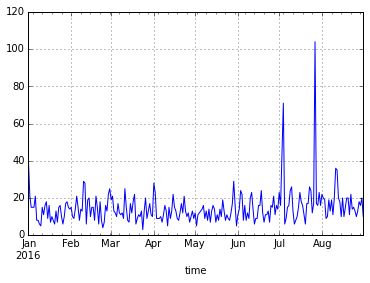

In [8]:
# 5. graph each day in 2016 and see which day had the most! (Is it July 4th?)

import matplotlib.pyplot as plt
%matplotlib inline

ufo.groupby(pd.Grouper(key='time',freq='1d')).count().day.plot()

# no it is not 4th of july

In [9]:
##### TWITTER ######

# Create a dataframe where each row is a tweet that uses any tag (or tags) you choose!
# include a column for date, text, user handle, user name, and user image
# You can use the normal query method and not stream for this!

api_key = 'g5uPIpw80nULQI1gfklv2zrh4'
api_secret = 'cOWvNWxYvPmEZ0ArZVeeVVvJu41QYHdUS2GpqIKtSQ1isd5PJy'
access_token = '49722956-TWl8J0aAS6KTdcbz3ppZ7NfqZEmrwmbsb9cYPNELG'
access_secret = '3eqrVssF3ppv23qyflyAto8wLEiYRA8sXEPSghuOJWTub'

# Masahpe Key
mashape_key = '0CLvblsJOxmshWkaep4szo9CILOMp1PM3hhjsnDi4k8g8ME14o'

In [10]:
import tweepy       # python wrapper for twitter api
import json
import time

In [11]:
# Create a dataframe where each row is a tweet that uses any tag (or tags) you choose!
tag = 'Proscia'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object
tweets = api.search(q=tag)

In [12]:
# include a column for date, text, user handle, user name, and user image
rio_tweets = {'date': [], 'text': [],
        'user_handle': [], 'user_name': [],
        'user_image': []}

for t in tweets:
    rio_tweets['date'].append(t.created_at)
    rio_tweets['text'].append(t.text)
    rio_tweets['user_handle'].append(t.author.screen_name)
    rio_tweets['user_name'].append(t.author.name)
    rio_tweets['user_image'].append(t.author.profile_image_url)

In [13]:
# You can use the normal query method and not stream for this!

rio_tweets_df = pd.DataFrame(rio_tweets)

In [14]:
rio_tweets_df.head()

,date,text,user_handle,user_image,user_name
0,2016-10-26 22:23:17,RT @girlposts: THIS IS WHY YOU SHOULDN'T FALL ...,hayley_proscia,http://pbs.twimg.com/profile_images/7826628997...,Hayley Proscia
1,2016-10-26 22:13:48,RT @teenagernotes: why hasn't snapchat made gr...,hayley_proscia,http://pbs.twimg.com/profile_images/7826628997...,Hayley Proscia
2,2016-10-26 21:15:08,Proscia Pathology Cloud Now with New Cancer Im...,dwesty,http://pbs.twimg.com/profile_images/1671988086...,David West
3,2016-10-26 18:55:07,Proscia Pathology Cloud Now with New #Cancer I...,drseisenberg,http://pbs.twimg.com/profile_images/7809533839...,Dr. Steven Eisenberg
4,2016-10-26 18:45:05,When you in your school lounge and two girls h...,alyssa_proscia,http://pbs.twimg.com/profile_images/7913695356...,Alyssa Proscia
